In [35]:
import pandas as pd
import time
from matplotlib import pyplot
import numpy as np
import itertools
from mpl_toolkits.mplot3d import Axes3D
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler , MinMaxScaler
from sklearn.pipeline import Pipeline
import sklearn.neural_network as nn
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier,AdaBoostClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.manifold import TSNE

In [36]:
#Neural Network
import tensorflow as tf
from tensorflow.python.keras.optimizers import *
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils.np_utils import to_categorical

In [37]:
train = pd.read_csv(r'train/train.csv')
test = pd.read_csv(r'test/test.csv')

In [38]:
peek=train.head()
print(peek)
print(train.Activity.value_counts()) # counting activities
print(train.shape)
print(test.shape)

   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   
2         -0.967187         -0.978944         -0.996520         -0.963668   
3         -0.983403         -0.990675         -0.997099         -0.982750   
4         -0.980817         -0.990482         -0.998321         -0.979672   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyr

In [39]:
#shuffling data

test =shuffle(test) # ruin the sequence data
train=shuffle(train)
print(train.head())

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
19             0.275568          -0.016980          -0.111429   
1264           0.353527          -0.036623          -0.093492   
941            0.212091          -0.023546          -0.118643   
975            0.205437           0.000828          -0.136915   
5129           0.278850          -0.017464          -0.113016   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
19           -0.997811         -0.990522         -0.997621         -0.998205   
1264         -0.296752          0.187732         -0.387994         -0.360650   
941          -0.218702         -0.030736         -0.432796         -0.289117   
975          -0.080962         -0.007988         -0.323966         -0.144682   
5129         -0.997168         -0.989153         -0.990088         -0.997625   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
19           -0.989470         -0.997193         -0.945662  .

In [40]:
#Separate Input and Output Labels
# dropping Activity and subject
trainData = train.drop(['Activity','subject'], axis=1).values
trainLabel = train.Activity.values

testData = test.drop(['Activity','subject'], axis=1).values
testLabel = test.Activity.values

In [41]:
def plot_activity(activity, df):
    data = df[df['activity'] == activity][['x-axis', 'y-axis', 'z-axis']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12), 
                     title=activity)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))

In [42]:
encoder = LabelEncoder()

In [43]:
#encoding test labels

encoder.fit(testLabel)
testLabelE = encoder.transform(testLabel)

In [44]:
#encoding train labels

encoder.fit(trainLabel)
trainLabelE = encoder.transform(trainLabel)

In [45]:
# Logistic Regression
start = time.time()
model = LogisticRegression(C=0.1)
print(model)
model.fit(trainData,trainLabelE)
LogisticReg_Score=model.score(testData,testLabelE)
print(LogisticReg_Score)  # 0.95
end = time.time()
total_time =end-start
print('Time of Logistic Regression %.4f' % total_time)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.9552086868001357
Time of Logistic Regression 1.9029


F:\anaconda3pkd\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [46]:
# try PCA and LDA for Logistic Regression


start = time.time()
pca= PCA(0.9) # capture the %85 of the variance
pca.fit(trainData)
Reduced_trainData=pca.transform(trainData)
Reduced_testData=pca.transform(testData) # use the same transform for test

model.fit(Reduced_trainData,trainLabelE)
PCA_Score=model.score(Reduced_testData,testLabelE)
print("PCA Score:%f" %(PCA_Score)) #worse performance but train faster
end = time.time()
total_time =end-start
print('Time of PCA %.4f' % total_time)

start = time.time()
LDA=LinearDiscriminantAnalysis()
LDA.fit(trainData,trainLabelE)
LDA_traindata=LDA.transform(trainData)
LDA_testdata=LDA.transform(testData)
model.fit(LDA_traindata,trainLabelE)
lda_score=model.score(LDA_testdata,testLabelE)
print("LDA Score:%f" %(lda_score)) #worse performance but train faster
end = time.time()
total_time =end-start
print('Time of LDA %.4f' % total_time)

F:\anaconda3pkd\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


PCA Score:0.917883
Time of PCA 1.2656
LDA Score:0.963353
Time of LDA 1.2606


F:\anaconda3pkd\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [47]:
# Scale Features

scaler = MinMaxScaler()
scaler.fit(LDA_traindata)
Scaled_trainData = scaler.transform(LDA_traindata)
Scaled_testData = scaler.transform(LDA_testdata)

model.fit(Scaled_trainData,trainLabelE)
Scaled_Score=model.score(Scaled_testData,testLabelE)
print("Scaled Data Score:%f" %(Scaled_Score)) #0.947

Scaled Data Score:0.962674


In [48]:
# appylying supervised neural network using multi-layer perceptron

mlpSGD  =  nn.MLPClassifier(hidden_layer_sizes=(90,) \
                        , max_iter=1000, alpha=1e-4  \
                        , solver='sgd' ,verbose=10   \
                        , tol=1e-19    , random_state =1 \
                        , learning_rate_init=.001)

mlpADAM  =  nn.MLPClassifier(hidden_layer_sizes=(90,) \
                        , max_iter=1000, alpha=1e-4  \
                        , solver='adam' ,verbose=10   \
                        , tol=1e-19    , random_state =1 \
                        , learning_rate_init=.001)

nnModelADAM = mlpADAM.fit(Scaled_trainData, trainLabelE)

predicted = nnModelADAM.predict(Scaled_testData)
matrix = confusion_matrix(testLabelE, predicted)
print(matrix)
print(nnModelADAM.score(Scaled_testData,testLabelE))

Iteration 1, loss = 1.67322813
Iteration 2, loss = 1.45702155
Iteration 3, loss = 1.23682758
Iteration 4, loss = 1.01100722
Iteration 5, loss = 0.80082315
Iteration 6, loss = 0.62579085
Iteration 7, loss = 0.48984620
Iteration 8, loss = 0.38792704
Iteration 9, loss = 0.31217585
Iteration 10, loss = 0.25507614
Iteration 11, loss = 0.21157526
Iteration 12, loss = 0.17880481
Iteration 13, loss = 0.15375600
Iteration 14, loss = 0.13458809
Iteration 15, loss = 0.11914463
Iteration 16, loss = 0.10675434
Iteration 17, loss = 0.09666961
Iteration 18, loss = 0.08878909
Iteration 19, loss = 0.08221846
Iteration 20, loss = 0.07686959
Iteration 21, loss = 0.07230627
Iteration 22, loss = 0.06848996
Iteration 23, loss = 0.06524842
Iteration 24, loss = 0.06263240
Iteration 25, loss = 0.06016085
Iteration 26, loss = 0.05814779
Iteration 27, loss = 0.05631640
Iteration 28, loss = 0.05463368
Iteration 29, loss = 0.05327321
Iteration 30, loss = 0.05191137
Iteration 31, loss = 0.05128873
Iteration 32, los

In [49]:
## Keras Neural Network
n_input = Scaled_trainData.shape[1] # number of features
n_output = 6 # number of possible labels
n_samples =  Scaled_trainData.shape[0] # number of training samples
n_hidden_units = 40
Y_test=to_categorical(testLabelE) # one-hot encoded labels
Y_train=to_categorical(trainLabelE)

In [50]:
def create_model():
    model = Sequential()
    model.add(Dense(n_hidden_units,input_dim=n_input,activation="relu"))
    model.add(Dense(n_hidden_units,input_dim=n_input,activation="relu"))
    model.add(Dense(n_output,activation="softmax"))
    # Compile Model
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=create_model, epochs=20, batch_size=10, verbose=False)
estimator.fit(Scaled_trainData,Y_train)
print("Keras Classifier Score:{}".format(estimator.score(Scaled_testData,Y_test))) # 0.95

Keras Classifier Score:0.966406524181366


In [51]:
# Ensemble Methods
Y_test=to_categorical(testLabelE) # one-hot encoded labels
Y_train=to_categorical(trainLabelE)

model=ExtraTreesClassifier(n_estimators=500)
model.fit(Scaled_trainData,Y_train)
print("ExtraTree Classifier results %.3f" %model.score(Scaled_testData,Y_test)) # 0.915

model=RandomForestClassifier(n_estimators=500)
model.fit(Scaled_trainData,Y_train)
print("RandomForest Classifier results %.3f" %model.score(Scaled_testData,Y_test)) # 0.90

ExtraTree Classifier results 0.959
RandomForest Classifier results 0.959


In [52]:
##Knearest Neighbors

clf= KNeighborsClassifier(n_neighbors=12)
knnModel = clf.fit(Scaled_trainData,trainLabelE)
y_te_pred = clf.predict(Scaled_testData)

acc = accuracy_score(testLabelE,y_te_pred)
print("K-Nearest Neighbors Accuracy: %.5f" %(acc)) #.907

K-Nearest Neighbors Accuracy: 0.96403


In [53]:
#Keras model with different optimizers and dropout layers
Y_test=to_categorical(testLabelE) # one-hot encoded labels
Y_train=to_categorical(trainLabelE)

model = Sequential()
model.add(Dense(64, input_dim=Scaled_trainData.shape[1], activation="relu"))
model.add(Dropout(0.5)) # To avoid overfitting
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(6, activation="softmax"))

In [54]:
model.compile(loss="categorical_crossentropy", metrics=['accuracy'])
model.fit(Scaled_trainData,Y_train,batch_size=128)
score = model.evaluate(Scaled_testData,Y_test,batch_size=128)
print(score)  # 0.956

24/24 [==============================] - 0s 1ms/step - loss: 1.1238 - accuracy: 0.8850
[1.123795747756958, 0.8849677443504333]


In [55]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(Scaled_trainData,Y_train,batch_size=128) #nb_epoch=30,<-- removed this one
score = model.evaluate(Scaled_testData,Y_test,batch_size=128)
print(score)  # 0.95

24/24 [==============================] - 0s 1ms/step - loss: 0.6026 - accuracy: 0.9511
[0.6026111841201782, 0.9511367678642273]


Accuracy: 0.851374
Confusion matrix, without normalization
[[537   0   0   0   0   0]
 [  0 374 116   0   0   1]
 [  0  82 449   0   0   1]
 [  0   0   0 454  25  17]
 [  0   0   0  22 349  49]
 [  0   0   0  75  50 346]]


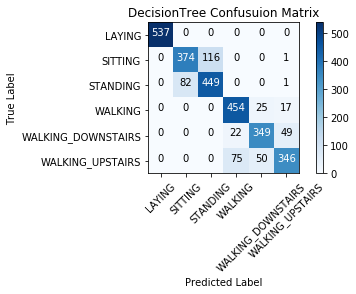

In [56]:
##Ploting Confusion Matrix
def plot_confusion_matrix (cm, classes, normalize=False, title='Confusion Matrix', cmap=pyplot.cm.Blues,
                           decsnTreeClf=None):
    #This function prints and plots the confusion matrix.
    pyplot.imshow(cm,interpolation='nearest',cmap=cmap)
    pyplot.title(title)
    pyplot.colorbar()
    tick_marks=np.arange(len(classes))
    pyplot.xticks(tick_marks,classes,rotation=45)
    pyplot.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        pyplot.text(j,i,cm[i,j],horizontalalignment="center", color="white" if cm[i,j]> thresh else "black" )

    pyplot.tight_layout()
    pyplot.ylabel('True Label')
    pyplot.xlabel('Predicted Label')
    pyplot.show()
decsnTreeClf = DecisionTreeClassifier(criterion='entropy')
tree= decsnTreeClf.fit(trainData,trainLabelE)
testPred = tree.predict(testData)

acc= accuracy_score(testLabelE,testPred)
cfs=confusion_matrix(testLabelE,testPred)



print("Accuracy: %f" %acc)

pyplot.figure()
class_names = encoder.classes_
plot_confusion_matrix(cfs,classes=class_names,title="DecisionTree Confusuion Matrix")

F:\anaconda3pkd\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR: 0.947404


F:\anaconda3pkd\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QDA: 0.760774
KNN: 0.888700
D.Tree: 0.854089
NB: 0.770275
SVM: 0.956566
          Scores
Model           
LR      0.947404
QDA     0.760774
KNN     0.888700
D.Tree  0.854089
NB      0.770275
SVM     0.956566


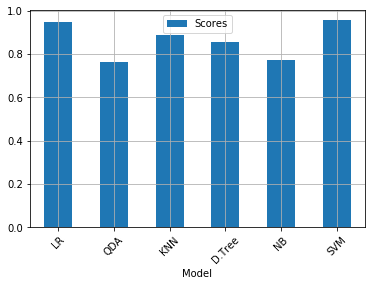

In [57]:
## Multiple Classifier Evaluation

# Standardize the dataset
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression(C=100))])))
pipelines.append(('QDA', Pipeline([('Scaler', StandardScaler()),('LDA',
QuadraticDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier(7))])))
pipelines.append(('D.Tree', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(C=100,kernel='rbf',decision_function_shape='ovo' ))])))
results = []
names = []
for name, model in pipelines:
    model.fit(trainData,trainLabelE)
    y_pred = model.predict(testData)
    results.append(accuracy_score(y_pred,testLabelE))
    names.append(name)
    msg = "%s: %f" % (name, accuracy_score(y_pred,testLabelE))
    print(msg)

score_df = pd.DataFrame({'Model':names,'Scores':results}).set_index('Model')
print(score_df)
ax=score_df.plot.bar()
ax.set_xticklabels(score_df.index,rotation=45,fontsize=10)
pyplot.grid(True)

In [58]:
# Tune scaled SVM

scaler = StandardScaler().fit(trainData)
rescaledX = scaler.transform(trainData)
c_values = [0.1, 1.0, 100, 1000]
kernel_values = ['linear', 'rbf']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=5, random_state=7, shuffle= True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, trainLabelE)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.987758 using {'C': 100, 'kernel': 'rbf'}
0.984358 (0.002918) with: {'C': 0.1, 'kernel': 'linear'}
0.932536 (0.005447) with: {'C': 0.1, 'kernel': 'rbf'}
0.984493 (0.002213) with: {'C': 1.0, 'kernel': 'linear'}
0.977284 (0.005123) with: {'C': 1.0, 'kernel': 'rbf'}
0.979188 (0.004008) with: {'C': 100, 'kernel': 'linear'}
0.987758 (0.002620) with: {'C': 100, 'kernel': 'rbf'}
0.979188 (0.004008) with: {'C': 1000, 'kernel': 'linear'}
0.987758 (0.002620) with: {'C': 1000, 'kernel': 'rbf'}
